## Check simulations of BDs

In [2]:
import sys
sys.path.append("../python/")
sys.path.append("../python/cluster")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.palettes
import imp
from matplotlib.offsetbox import AnchoredText
import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population, spatial_sampling, rho
from astropy.constants import R_jup, M_jup, M_sun, L_sun
from scipy.interpolate import interp1d, interp2d
from utils import temperature, heat, temperature_withDM

from matplotlib import rc
rc('font', family='times new roman', size=22.)

### Empirical space densities at the Solar neighbourhood

Data below is taken from Table 15 of [Kirkpatrick + '20](https://arxiv.org/abs/2011.11616)

In [3]:
# temperature [K]
bin_edges = [300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250] 
# space density [x 1e-3 pc-3]
rho       = [2.84, 4.24, 2.80, 1.99, 1.72, 1.11, 1.95, 0.94, 0.81, 0.78, 0.50, 0.72, 0.31] 
error_rho = [np.nan, 0.70, 0.37, 0.32, 0.30, 0.25, 0.30, 0.22, 0.20, 0.20, 0.17, 0.18, np.nan]

bins = np.zeros(len(rho))

for i in range(len(rho)):
    bins[i] = 0.5*(bin_edges[i] + bin_edges[i+1])

#TODO - need to plot arrows for lower limits

Text(0.5, 0, '$T_{\\rm eff}$ [K]')

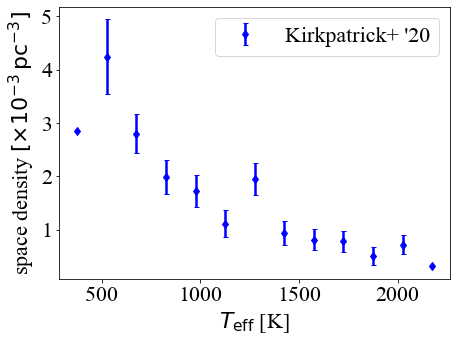

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.errorbar(bins, rho, error_rho, fmt="d", elinewidth=2.5, capsize=2.5, label="Kirkpatrick+ '20", color="blue")

ax.legend()
ax.set_ylabel(r"space density $\rm [\times 10^{-3}\,pc^{-3}]$")
ax.set_xlabel(r"$T_{\rm eff}$ [K]")

### Spatial distribution

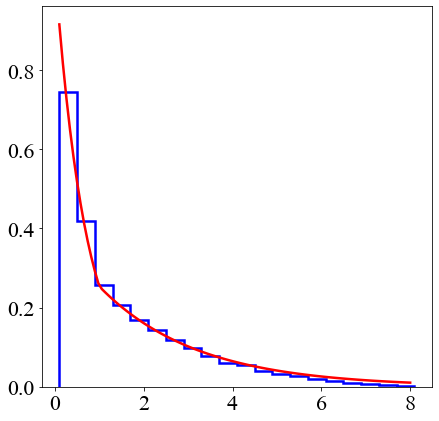

In [31]:
# Checking sampling results

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 8., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 8.178, args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)

_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)


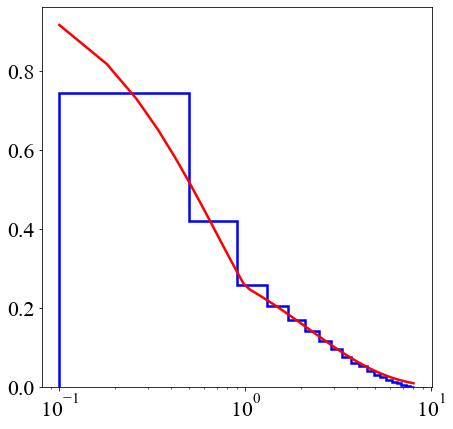

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 8., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 8.178, args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)

_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)

ax.set_xscale("log")

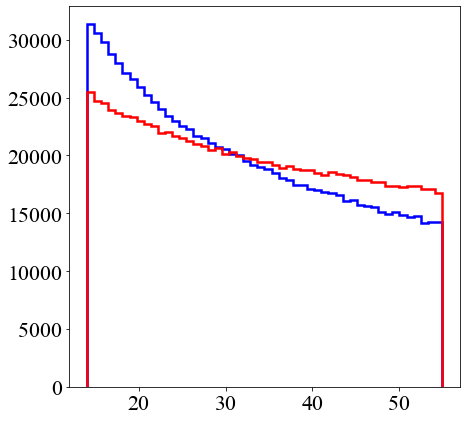

In [14]:
from utils import random_powerlaw

N = 1000000
mass1 = random_powerlaw(-0.6, N, Mmin=14, Mmax=55)
mass2 = random_powerlaw(-0.3, N, Mmin=14, Mmax=55)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
_, _, _ = ax.hist(mass1, color="blue", histtype="step", bins=50, linewidth=2.5)
_, _, _ = ax.hist(mass2, histtype="step", color="red", bins=50, linewidth=2.5)

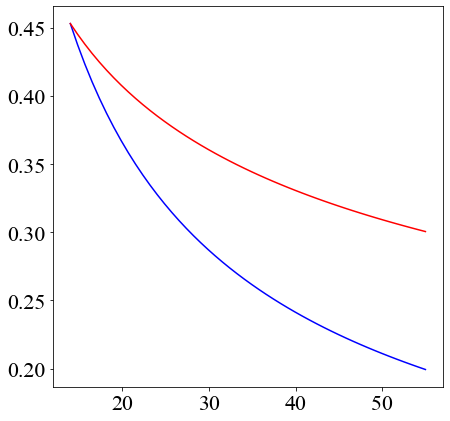

In [11]:
def IMF(M, alpha):
    return np.power(M, -alpha)

M = np.linspace(14, 55)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(M, IMF(14, 0.3)/IMF(14, 0.6)*IMF(M, 0.6), color="blue")
ax.plot(M, IMF(M, 0.3), color="red")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(M, IMF(14, 0.3)/IMF(14, 0.6)*IMF(M, 0.6), color="blue")
ax.plot(M, IMF(M, 0.3), color="red")